# Agile Tools - Survey 2021

### Reading the data

The data comes from 2021 Developer Survey conducted by Stack Overflow. You can find it in the data directory. You can also download this and previous survey results from [here](https://insights.stackoverflow.com/survey).

In [164]:
import pandas as pd

survey_data_file_path = "data/survey_results_public2021.csv"
survey_df = pd.read_csv(survey_data_file_path, index_col="ResponseId")
survey_df.head()

,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


### Data cleaning
#### 1. Professionals only
Interested in professionals only. `MainBranch` column seems to contain such information. Let's find out what are possible values in this column.

In [165]:
unique_branches = survey_df["MainBranch"].unique()
print("\n".join(f"- {branch}" for branch in unique_branches))

- I am a developer by profession
- I am a student who is learning to code
- I am not primarily a developer, but I write code sometimes as part of my work
- I code primarily as a hobby
- I used to be a developer by profession, but no longer am
- None of these


It seems that I should take into account only respondents that answered: *I am a developer by profession*.

In [166]:
is_professional_dev = survey_df["MainBranch"] == "I am a developer by profession"
survey_df = survey_df[is_professional_dev]
survey_df.head()

,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN
9,I am a developer by profession,Employed part-time,India,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18 - 24 years,Coding Bootcamp,6,4,...,25-34 years old,Man,No,NaN,South Asian,NaN,I have a concentration and/or memory disorder ...,Appropriate in length,Easy,NaN
10,I am a developer by profession,Employed full-time,Sweden,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,School,7,4,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,51552.0


In [177]:
survey_df.index.size
# total os 58K respondents

151500

#### 2. Do you use agile?
Unfortunately, there is such question. we can use the feature `ToolsTechHaveWorkedWith` column instead. Assumption is that if the answer is 'Docker', 'Kubernetes', 'Flow'] there is a high chance that the respondent is working in an Agile environment, because those tools are crucial for MLOPs

In [199]:
survey_df['ToolsTechHaveWorkedWith'] = survey_df['ToolsTechHaveWorkedWith'].fillna('')
survey_df["ToolsTechHaveWorkedWith"].head().to_frame()  # .to_frame() is used for nicer output in the notebook

,ToolsTechHaveWorkedWith
ResponseId,
1,
4,
5,Docker;Git;Kubernetes;Yarn
5,Docker;Git;Kubernetes;Yarn
5,Docker;Git;Kubernetes;Yarn


In [201]:
#agile =['Docker', 'Git', 'Flow', 'Kubernetes']
agile =['Docker', 'Kubernetes', 'Flow']

pattern = '|'.join(agile)
survey_df["UseJira"] = survey_df['ToolsTechHaveWorkedWith'].str.contains(pattern).astype(bool)

In [202]:
survey_df.head(3)

,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,...,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly,UseJira
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,...,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0,False
4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,...,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN,False
5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,...,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN,True


#### 3. What type of developer are you?

Answering this question is easy. `DevType` column meet my expectations, given the fact that one of the possible answers was “Data scientist or machine learning specialist”. See the “Which of the following describe you?” in the CSV file

In [203]:
survey_df["DevType"].head().to_frame()

,DevType
ResponseId,
1,"Developer, mobile"
4,"Developer, front-end"
5,"Developer, desktop or enterprise applications"
5,"Developer, full-stack"
5,"Engineer, data"


In [204]:
def explode_str_column(df, column):
    df[column] = df[column].str.split(";")
    return df.explode(column)

There is a tiny bit of cleanup needed, before using `DevType` column. There are multiple answers per row separated by a semicolon. It will be easier to group results later on if we explode such answers to many rows. Luckily we do have a util function to do the trick.

In [205]:
survey_df = explode_str_column(survey_df, "DevType")
survey_df["DevType"].head().to_frame()

,DevType
ResponseId,
1,"Developer, mobile"
4,"Developer, front-end"
5,"Developer, desktop or enterprise applications"
5,"Developer, full-stack"
5,"Engineer, data"


### Results and plot

Data cleanup that we just did makes it easy to group respondents by `DevType` and count how many of them `UseJira`.

In [206]:
agile_by_role = survey_df.groupby("DevType")[["UseJira"]].mean().sort_values("UseJira")
agile_by_role *= 100
agile_by_role = agile_by_role.rename(columns={"UseJira": "Use Agile"})
agile_by_role.index.rename("Role", inplace=True)
agile_by_role

,Use Agile
Role,
Marketing or sales professional,39.563863
Designer,40.231432
"Developer, mobile",40.586743
"Developer, game or graphics",44.017807
"Developer, desktop or enterprise applications",44.719585
Data or business analyst,46.967341
"Developer, front-end",48.129676
"Developer, embedded applications or devices",48.883080
Student,49.169110


The representation above is informative, but it would be nice to finish with a neat plot. I'm highlighting Data Scientist and related roles to make the plot more verbose.

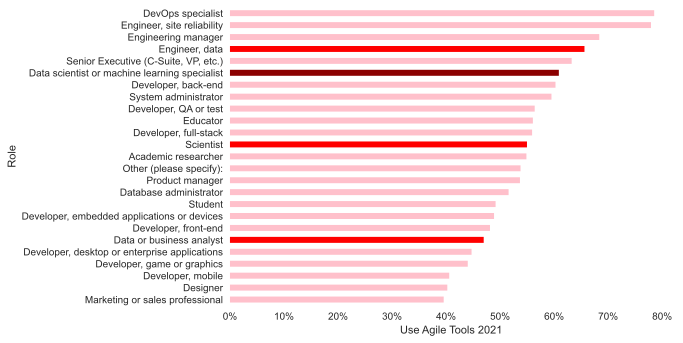

In [208]:
%matplotlib inline
%config InlineBackend.figure_format = "svg"

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

plt.style.use("seaborn")

def get_color(role):
    data_scientist = "Data scientist or machine learning specialist"
    data_science_related_roles = (
        "Scientist",
        "Data or business analyst",
        "Engineer, data",
    )
    if role == data_scientist:
        return "darkred"
    if role in data_science_related_roles:
        return "red"
    return "pink"

bar_colors = [get_color(role) for role in agile_by_role.index]
ax = agile_by_role["Use Agile"].plot(kind="barh",  color=bar_colors)
plt.xlabel("Use Agile Tools 2021 ")
plt.grid(False)
ax.patch.set_facecolor("white")
ax.xaxis.set_major_formatter(FormatStrFormatter("%d%%"))
plt.show()